# AM207 Homework 1

##### Data: wine_quality_missing.csv

**Harvard University**<br>
**Fall 2018**<br>
**Instructors: Rahul Dave**<br>
**Due Date: ** Saturday, September 15th, 2018 at 11:59pm



**Instructions:**

- Upload your final answers as well as your iPython notebook containing all work to Canvas.

- Structure your notebook and your work to maximize readability.


In [31]:
import numpy as np
import scipy.stats
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from matplotlib import cm
import pandas as pd
import seaborn as sns
%matplotlib inline

## Question 1: Don't Be Sensitive, We're Looking For False Positivity

**Coding not required**

As the U.S. aims to increase early identification and treatment of people with HIV, a greater focus has been placed on determining the accuracy of HIV tests in real-world settings in order to better identify individuals during the early (acute) stages of infection when transmission risk is especially high.  In order to quantify this, researchers from the University of California, San Francisco conducted a review of over 21,234 HIV tests given between the years 2003 and 2008 in some of the city's highest prevalence populations.  Two of the tests included in the study -- the OraQuick Advance Blood Rapid Antibody Test (a 3rd generation fingerstick blood test we'll henceforth call the **BRT**) and the OraQuick Advance Saliva Rapid Antibody Test (a 3rd generation saliva test we'll henceforth call the **SRT**) -- can be considered Rapidly Administered tests.  According to Wikipedia, the overall prevalence of adult HIV in the United States is 0.3%

You and your partner decide to undergo tests for HIV and the two of you are administered the SRT at an HIV screening clinic.  You're aware that the test you've been administered (one of the tests featured in the study) has a sensitivity (true positive rate) of 86.6% and a specificity (true negative rate) of 98.6%.

1.1. In the unfortunate event that your partner tests positive what is the probability that he/she has HIV?

1.2. Should you be concerned enough to ask for further testing or treatment for your partner?  Justify your answer quantitatively.

1.3. The medical staff at the screening clinic decides to independently administer the BRT as it is the only other test they can administer on site.  Based on the UCSF study above, you're aware that this test has a sensitivity (true positive rate) of 91.9% and a specificity of 99.6%.  What is the probability that your partner has the HIV if both tests come up positive (Make the assumption that the independent administration means that the tests are independent of each other)?

It turns out the screening clinic didn't have the second test and you and your partner were only able to be administered the SRT. However, on your way home you're reminded that your partner has spent almost all his/her life in the Bahamas where the prevalence of adult HIV is 3.3%.

1.4. What is the probability that your Bahamian partner has HIV given that he/she received a positive test result on the SRT?

1.5. How does the new information quantifiably affect your decision of whether you should  be concerned enough to ask for treatment or testing for your partner?

*Make sure to justify your decisions using your calculations.*

**Solution**:

<div class="answer-separator">
------------------------
</div>

<h4>1.1. In the unfortunate event that your partner tests positive what is the probability that he/she has HIV?</h4>

Denote by $\pm$ the event that a test is positive/negative, by $\text{HIV}$ the event that a person has HIV and by $\overline{\text{HIV}}$ the event that a person does not have HIV. We are interested in $P\left(\text{HIV} \vert +\right)$ (and we are considering the **BRT** test). We can use Bayes' theorem:

$$P\left(\text{HIV} \vert +\right) = \frac{P\left(+ \vert \text{HIV} \right) P (\text{HIV})}{P(+)} \:.$$

We can calculate $P(+) = P(+ \vert \text{HIV}) P(\text{HIV}) + P(+ \vert \overline{\text{HIV}}) P(\overline{\text{HIV}}) \:.$ Now we have all quantities:


+ $P(+ \vert \text{HIV}) = 0.866$
+ $P(+ \vert \overline{\text{HIV}}) = 1 - P(- \vert \overline{\text{HIV}}) = 1 - 0.986 = 0.014$
+ $P(\text{HIV}) = 0.003$
+ $P(\overline{\text{HIV}} = 1 - 0.003 = 0.997$

We can now plug in all numbers into the equation above:

$$P\left(\text{HIV} \vert +\right) = \frac{0.866 \times 0.003}{0.866 \times 0.003 + 0.014 \times 0.997} \:.$$

In [136]:
"Probability of having HIV: {:.3f}".format(0.866 * 0.003 / (0.866 * 0.003 + 0.014 * 0.997))

'Probability of having HIV: 0.157'

<h4>1.2. Should you be concerned enough to ask for further testing or treatment for your partner?  Justify your answer quantitatively.</h4>

<div class="answer">

<br>
It's hard to justify the answer quantitatively, but for my risk appetite, a 15.7% probability of my partner having HIV is reason enough to ask for further testing. For treatment, definitely not.
<br>

</div>

<div class="answer-separator">
------------------------
</div>

<h4>1.3. The medical staff at the screening clinic decides to independently administer the BRT as it is the only other test they can administer on site.  Based on the UCSF study above, you're aware that this test has a sensitivity (true positive rate) of 91.9% and a specificity of 99.6%.  What is the probability that your partner has the HIV if both tests come up positive (Make the assumption that the independent administration means that the tests are independent of each other)?</h4>

The calculation is pretty much the same as before, but now we have a different prior probability, namely $P(\text{HIV}) = 0.157$. The numbers required to do the calculation are:

+ $P(+ \vert \text{HIV}) = 0.919$
+ $P(+ \vert \overline{\text{HIV}}) = 1 - P(- \vert \overline{\text{HIV}}) = 1 - 0.996 = 0.004$
+ $P(\text{HIV}) = 0.157$
+ $P(\overline{\text{HIV}} = 1 - 0.157 = 0.843$

With these numbers we can now calculate

$$P\left(\text{HIV} \vert +\right) = \frac{0.919 \times 0.157}{0.919 \times 0.157 + 0.004 \times 0.843} \:.$$

In [142]:
print("Probability of having HIV with two positive tests: {:.2f}".format(0.919 * 0.157 / (0.919 * 0.157 + 0.004 * 0.843)))

Probability of having HIV with two positive tests: 0.98


<div class="answer-separator">
------------------------
</div>

<h4>1.4. What is the probability that your Bahamian partner has HIV given that he/she received a positive test result on the SRT?</h4>

<div class="answer">

<br>
$$P\left(\text{HIV}\vert \text{Bahamian}, +\right) = \frac{0.866 \times 0.033}{0.866 \times 0.033 + 0.014 \times 0.967} \:.$$
<br>

</div>

In [143]:
"Probability of having HIV given the partner is Bahamian: {:.3f}".format(0.866 * 0.033 / (0.866 * 0.033 + 0.014 * 0.967))

'Probability of having HIV given the partner is Bahamian: 0.679'

<div class="answer-separator">
------------------------
</div>

<h4>1.5. How does the new information quantifiably affect your decision of whether you should  be concerned enough to ask for treatment or testing for your partner?</h4>

<div class="answer">

<br>
With a probability of 0.68, further testing would be highly recommended. Assuming that side effects of HIV drugs are quite heavy, I would not recommend to start treatment yet, but insist on quick testing.
<br>

</div>

<div class="answer-separator">
------------------------
</div>

## Question 2: Visualize Yourself Missing Your Data

**Some Coding required**

Missing data is a very important topic in statistics and machine learning and we may touch upon it a few times throughout the course. Let us begin to explore how to handle missing data in our analysis.  We'll be working with a dataset from the UCI Machine Learning Repository that uses a variety of wine chemical predictors to classify wines grown in the same region in Italy.  Each line represents 13 (mostly chemical) predictors of the response variable wine class, including things like alcohol content, hue, and phenols.  Unfortunately some of the predictor values were lost in measurement.  You'll find the dataset in a file called `wine_quality_missing.csv`.

**2.1. Read the data in the `wine_quality_missing.csv` into a pandas dataframe and store the dataframe in the variable `wine_df`.  How many observations are in the dataset? **

In [144]:
# Read in dataset with pandas.read_csv
wine_df = pd.read_csv("wine_quality_missing.csv")
wine_df.head(n=5)

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,1
1,13.20,1.78,2.14,NaN,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,1
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,1
3,14.37,1.95,2.50,NaN,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,1
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,NaN,4.32,1.04,2.93,735.0,1


In [145]:
# Calculate the number of rows
print("Number of observations: {}".format(wine_df.shape[0]))

Number of observations: 178


**2.2. One way to handle missing data is to just totally ignore it by removing any rows that have any missing values.  This is called *drop imputation*.  Use drop imputation on our wine quality dataframe and store the resulting dataframe in the variable `wine_drop`.  How many observations does the drop imputed dataset have?**

In [146]:
# Drop all rows with missing values
drop_imputed = wine_df.dropna()
assert pd.isna(drop_imputed).sum().sum() == 0, "Missing data still there"
print("Number of observations left: {}".format(drop_imputed.shape[0]))

Number of observations left: 43


** 2.3. Visualize using a normed histogram the values of Ash predictor in the drop imputed dataframe.  Overlay a fitted normal distribution on your plot.  Make sure to title the plot, include a legend and label axes. **

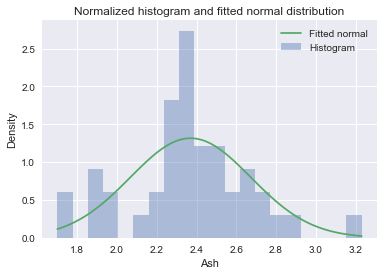

In [147]:
def plot_hist_normal(x):

    mu = x.mean()
    sd = x.std()

    x_ = np.linspace(x.min(), x.max(), 100)
    y_ = scipy.stats.norm.pdf(x_, loc=mu, scale=sd)


    sns.distplot(x, norm_hist=True, kde=False, label='Histogram', bins=20)
    plt.plot(x_, y_, label='Fitted normal')
    plt.title('Normalized histogram and fitted normal distribution')
    plt.ylabel('Density')
    plt.legend()
    
plot_hist_normal(drop_imputed['Ash'])

** 2.4. What are the mean and standard deviation of the values of the Ash feature in your drop imputed dataset? **

In [148]:
print("Mean of drop imputed Ash column: {:.2f}".format(drop_imputed['Ash'].mean()))
print("Standard deviation of drop imputed Ash column: {:.2f}".format(drop_imputed['Ash'].std()))

Mean of drop imputed Ash column: 2.37
Standard deviation of drop imputed Ash column: 0.30


** 2.5. Another way to handle missing data is to replace any missing value with the mean of the non-missing values in that *column*.  This is called *mean imputation*.  How many rows does our mean imputed dataset have? **

It has the same number of rows as the original dataset:

In [149]:
print("Number of rows in mean imputed dataset: {}".format(wine_df.shape[0]))

Number of rows in mean imputed dataset: 178


** 2.6. Visualize using a normed histogram the values of Ash predictor in the mean imputed dataframe.  Overlay a fitted normal distribution on your plot.  Make sure to title the plot, include a legend and label axes. **

In [150]:
def mean_impute(df):
    """
    Perform mean imputation on dataframe `df`.
    
    @param df pandas DataFrame
    """
    means = {col: df[col].mean() for col in df.columns}
    return df.fillna(means)
    
mean_imputed = mean_impute(wine_df)

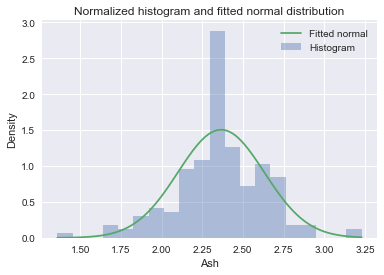

In [151]:
plot_hist_normal(mean_imputed['Ash'])

** 2.7. What are the mean and standard deviation of the Ash predictor values in your mean imputed dataset?  How do they compare to the mean and standard deviation of the drop imputed dataset? **

In [152]:
print("Mean of drop imputed Ash column: {:.2f}".format(mean_imputed['Ash'].mean()))
print("Standard deviation of drop imputed Ash column: {:.2f}".format(mean_imputed['Ash'].std()))

Mean of drop imputed Ash column: 2.37
Standard deviation of drop imputed Ash column: 0.27


The mean is the same, the standard deviation is a smaller. The former is clear and the latter statement as well, since we add points that have zero contribution to the empirical standard deviation.

## Part 3: Walk Softly and Carry a Broken Stick  

**Some Coding required**

3.1  A well-known probability problem, the **Broken Stick Problem** can be formulated as follows. *A stick is broken up at two points, chosen at random along its
length. Show that the probability that the pieces obtained form a triangle is 1/4.*  Write a function `simulate_broken_stick` that runs takes an integer parameter `n_sims`, runs that many simulations of the broken stick problem and returns a floating point number representing an estimate of the probability that the pieces of a stick randomly broken in two places form a triangle.  

**Hints**:

1. Use either np.random.rand or scipy.stats.uniform.rvs to simulate stick-breaking
2. Think about the triangle inequality

3.2 Run your function `simulate_broken_stick` with `n_sims` set to be equal to 50 and 1000.  What are your two estimates of the solution to the broken stick problem?

3.3 (Optional) Provide an analytic proof of the **Broken Stick Problem**.

**Hints**:

1. There's a very nice geometric proof taking advantage of [Viviani's Theorem][1].  Argue that every point in the equilateral triangle with height equal to the length of the stick maps to a particular breaking of the stick.  Divide the equilateral triangle into subtriangles by joining the midpoints.  What does it mean for a point to be outside the central equilateral subtriangle?
2. There's a more straightforward proof treating the breaking of the stick as joint uniform random variables.  What conditions does the triangle inequality impose on the joint random variable? How do you calculate the probability that the joint uniform meets those conditions? 

[1]: https://en.wikipedia.org/wiki/Viviani%27s_theorem

**Solution**:

<h4> 3.1  A well-known probability problem, the **Broken Stick Problem** can be formulated as follows. *A stick is broken up at two points, chosen at random along its
length. Show that the probability that the pieces obtained form a triangle is 1/4.*  Write a function `simulate_broken_stick` that runs takes an integer parameter `n_sims`, runs that many simulations of the broken stick problem and returns a floating point number representing an estimate of the probability that the pieces of a stick randomly broken in two places form a triangle.</h4>

Let the lengths of the three stcks be denoted by $x, y, z$ with $x \leq y \leq z$. Then, a necessary condition we need to have, is that 

$$x + y \geq z \:. $$

In [153]:
def simulate_broken_stick(n_sims=500):
    """
    Vectorized simulation of broken stick problem.
    
    @param n_sims integer number of simulations
    
    @returns float
    """
    # Simulate two break points and put smaller point in zeroth column
    break_points = np.random.rand(n_sims, 2)
    break_points.sort(axis=1)
    
    # Calculate three corresponding lengths
    length = np.zeros((n_sims, 3))
    length[:, 0] = break_points[:, 0]
    length[:, 1] = break_points[:, 1] - break_points[:, 0]
    length[:, 2] = 1 - break_points[:, 1]
    length.sort(axis=1)
    
    # Triangle inequality
    satisfies_ti = length[:, 0] + length[:, 1] < length[:, 2]
    
    return satisfies_ti.mean()

<h4>3.2 Run your function `simulate_broken_stick` with `n_sims` set to be equal to 50 and 1000.  What are your two estimates of the solution to the broken stick problem?</h4>

In [154]:
estimate_50 = simulate_broken_stick(n_sims=50)  # calculate estimate for 50 simulations
estimate_1000 = simulate_broken_stick(n_sims=1000)  # calculate estimate for 1000 simulations

In [155]:
## Make sure you present your answers somewhere here
print("Estimate of probability for 50 simulations {}".format(estimate_50))
print("Estimate of probability for 1000 simulations {}".format(estimate_1000))

Estimate of probability for 50 simulations 0.72
Estimate of probability for 1000 simulations 0.735


<h4>3.3 (Optional) Provide an analytic proof of the **Broken Stick Problem**.</h4>

Note that the "space of broken sticks" can be described as the triangle

$$\Delta = \{(x, y, z) \in \mathbb R ^ 3 \vert x, y, z \geq 0, x + y + z = 1\} $$

This triangle has an obvious $S_3$ permutation symmetry coming from permuting the coordinates. We can define a fundamental domain of $\Delta$ as

$$\Delta^f = \{(x, y, x) \in \mathbb R ^ 3 \vert x \leq y \leq z, x + y + z = 1 \} \:.$$

The projection $\pi: \mathbb R ^ 3 \rightarrow \mathbb R ^ 2, (x, y, z) \mapsto (x, y)$ induces a bijection of $\Delta$, and thus $\Delta^f$ and $\pi(\Delta)$. 